In [2]:
import os
import pickle
import glob
import random
import time

import pandas as pd
import numpy as np
import scipy.stats as stats
import xarray as xr
import matplotlib.pyplot as plt

import npc_lims
# from npc_sessions import DynamicRoutingSession


In [49]:
# n_units_list=[5,10,20,40,60]
n_units_list=[10,20,40]

In [52]:
#load data
decoder_confidence_versus_response_type={}
decoder_confidence_dprime_by_block={}
decoder_confidence_versus_trials_since_rewarded_target={}

for nn in n_units_list:
    n_units_str='_'+str(nn)+'_units'
    savepath=r"D:\decoding_results_from_CO\logreg_test_2024-11-13"
    decoder_confidence_versus_response_type[nn]=pd.read_pickle(os.path.join(savepath,'decoder_confidence_versus_response_type'+n_units_str+'.pkl'))
    decoder_confidence_dprime_by_block[nn]=pd.read_pickle(os.path.join(savepath,'decoder_confidence_dprime_by_block'+n_units_str+'.pkl'))
    decoder_confidence_versus_trials_since_rewarded_target[nn]=pd.read_pickle(os.path.join(savepath,'decoder_confidence_versus_trials_since_rewarded_target'+n_units_str+'.pkl'))

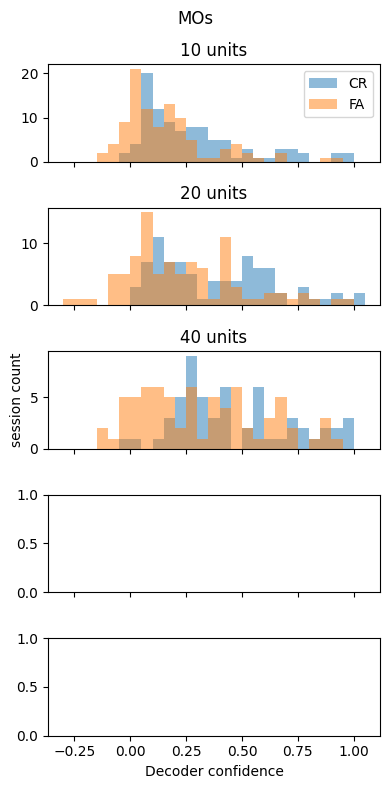

In [53]:
sel_area='MOs'

fig,ax=plt.subplots(5,1,sharex=True,figsize=(4,8))

for ii,nn in enumerate(n_units_list):
    xbins=np.arange(-0.3,1.1,0.05)
    cr_values=np.hstack(decoder_confidence_versus_response_type[nn].query('area==@sel_area and n_good_blocks>=4')['cr_all_confidence'].values)
    ax[ii].hist(cr_values,bins=xbins,alpha=0.5,label='CR')

    fa_values=np.hstack(decoder_confidence_versus_response_type[nn].query('area==@sel_area and n_good_blocks>=4')['fa_all_condfidence'].values)
    ax[ii].hist(fa_values,bins=xbins,alpha=0.5,label='FA')

    ax[ii].set_title(str(nn)+' units')

ax[0].legend()
ax[2].set_ylabel('session count')
ax[-1].set_xlabel('Decoder confidence')

fig.suptitle(sel_area)
fig.tight_layout()

In [17]:
decoder_confidence_versus_response_type[nn]

,session,area,project,vis_context_dprime,vis_hit_confidence,vis_fa_confidence,vis_cr_confidence,aud_context_dprime,aud_hit_confidence,aud_fa_confidence,...,n_good_blocks,correct_confidence,incorrect_confidence,cr_all_confidence,fa_all_condfidence,hit_all_confidence,ccf_ap_mean,ccf_dv_mean,ccf_ml_mean,n_units
0,699847_2024-04-15,CA1,DynamicRouting,0.296291,0.061077,-0.054041,0.278696,-0.051774,-0.153488,-0.120903,...,1,0.122171,0.047776,0.278696,0.043396,0.106712,8812.500000,2777.840909,2475.284091,88
1,699847_2024-04-15,CP,DynamicRouting,0.296291,0.209890,0.394667,0.492149,-0.051774,-0.243384,-0.169421,...,1,0.250315,0.264317,0.492149,0.269213,0.226430,5484.304933,3409.977578,3591.591928,223
2,699847_2024-04-15,LD,DynamicRouting,0.296291,0.206170,0.118289,0.071599,-0.051774,0.005010,-0.094340,...,1,0.099161,0.102903,0.071599,0.104950,0.101884,6674.742268,3236.340206,4502.061856,194
3,699847_2024-04-15,MB,DynamicRouting,0.296291,0.078259,0.167358,0.215587,-0.051774,-0.048095,-0.077251,...,1,0.077046,0.108432,0.215587,0.117172,0.063363,7883.720930,5006.395349,3415.891473,129
4,699847_2024-04-15,PO,DynamicRouting,0.296291,-0.003833,0.067178,0.072463,-0.051774,-0.118609,-0.059419,...,1,0.058055,0.058709,0.072463,0.062856,0.056632,6708.823529,3997.222222,4433.006536,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,733780_2024-09-06,MGm,DynamicRouting,2.866831,-0.032550,-0.140983,0.135158,2.462332,-0.128881,0.009668,...,3,0.083846,-0.032211,0.103072,-0.097211,0.060910,7859.375000,3854.861111,3826.736111,72
6,733780_2024-09-06,MOs,DynamicRouting,2.866831,0.000863,-0.032697,0.046830,2.462332,-0.052196,-0.014873,...,3,0.036151,0.041283,0.040820,-0.016840,0.030582,3347.775176,2414.695550,4187.529274,427
7,733780_2024-09-06,PoT,DynamicRouting,2.866831,-0.017919,-0.105625,0.054988,2.462332,-0.258228,-0.083587,...,3,0.176720,0.029599,0.205860,-0.042554,0.141956,7879.435484,4030.241935,3962.500000,62
8,733780_2024-09-06,RSPagl,DynamicRouting,2.866831,-0.009874,-0.142659,0.055962,2.462332,-0.050626,-0.167791,...,3,0.063389,0.016963,0.095440,-0.039176,0.025152,7211.111111,981.038647,4649.154589,207
